# 4. Pandas - plotting

In [1]:
#%pylab inline
from pandas import Series, DataFrame
import pandas as pd

## pandas中的繪圖函數

### 線型圖

In [2]:
# Series, DataFrame 的 plot()方法 預設是繪製 線型圖
s = Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))
s.plot()

NameError: name 'np' is not defined

In [4]:
# Series的索引會被作為subplot的 X軸，可以使用參數 use_index = False 來禁用該功能
# X軸的刻度可以透過 xticks 和 xlim 選向來調整
# Y軸的刻度可以透過 yticks 和 ylim 選向來調整 

In [3]:
# DataFrame的 plot()方法會在subplot中為每個 column繪製一條線，並自動創建legend
df = DataFrame(np.random.randn(10, 4).cumsum(0), 
               index = np.arange(0, 100, 10), 
               columns = ['A', 'B', 'C', 'D'])
df.tail(3)

,A,B,C,D
70,1.244362,-1.394270,2.195264,0.603918
80,1.468789,-2.627153,2.676494,0.708497
90,1.866575,-1.070248,1.518818,-0.566950


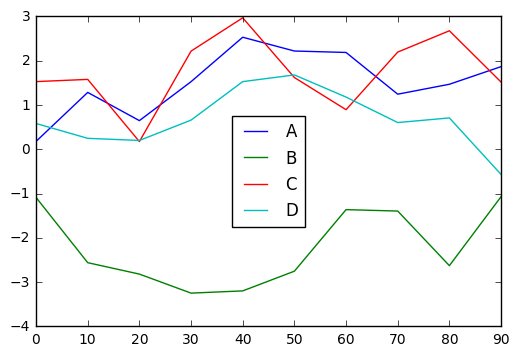

In [4]:
df.plot()

### 柱狀圖

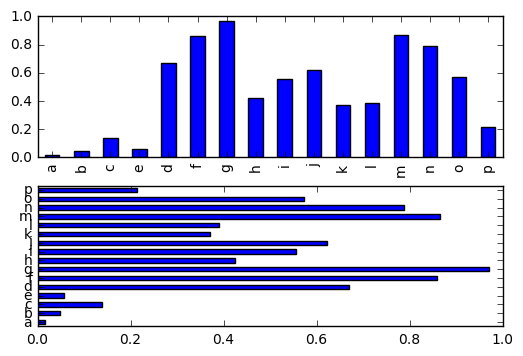

In [5]:
# 設定 kind = 'bar' 或 'barh' 即可繪製柱狀圖
# Series和 DataFrame的 索引會被當作subplot的 X軸(bar)或 Y軸(barh)

fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index = list('abcedfghijklmnop'))
data.plot(ax = axes[0], kind = 'bar')
data.plot(ax = axes[1], kind = 'barh')

In [6]:
df = DataFrame(np.random.rand(6, 4), 
               index = ['one', 'two', 'three', 'four', 'five', 'six'], 
               columns = pd.Index(['A', 'B', 'C', 'D'], name = 'Genus'))
df  
# DataFrame的每一 row的值分為一組

Genus,A,B,C,D
one,0.515945,0.811788,0.943648,0.867579
two,0.316411,0.724608,0.344452,0.288251
three,0.679358,0.754533,0.061721,0.371931
four,0.313235,0.824580,0.040101,0.007012
five,0.914099,0.439158,0.238110,0.259448
six,0.018562,0.744517,0.717414,0.872197


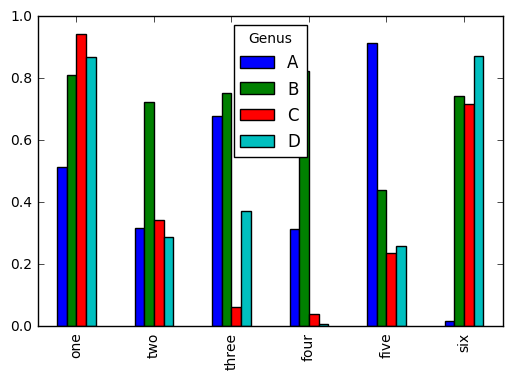

In [7]:
# DataFrame的每一 row的值分為一組
# columns 索引的 name屬性 被用來做為 legend的標題
df.plot(kind = 'bar')

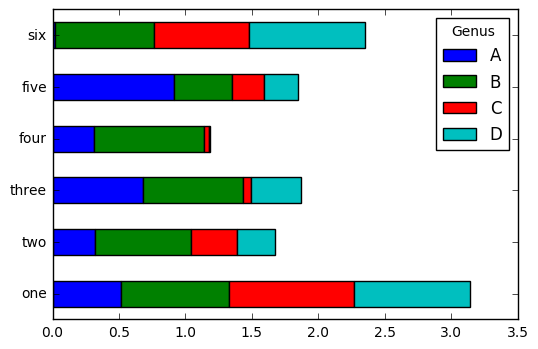

In [8]:
# 設定 stacked = True, 可繪製 堆積柱狀圖
df.plot(kind = 'barh', stacked = True)

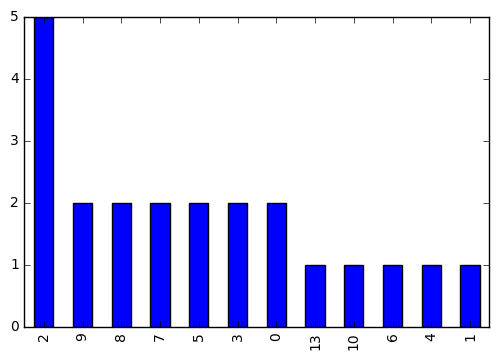

In [9]:
s = Series([2, 3, 5, 2, 5, 6, 7, 8, 9, 10, 13, 2, 3, 4, 7, 8, 9, 0, 0, 2, 2, 1])

# 用Series的 value_counts()直接繪製柱狀圖，表達每個數字出現的次數
vc = s.value_counts()
vc.plot(kind = 'bar')

In [10]:
tips = pd.read_csv('../data/tips.csv')
tips[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
# 用 crosstab()方法創建一個 交叉表，預設統計 發生的次數(計數)
party_counts = pd.crosstab(tips.day , tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


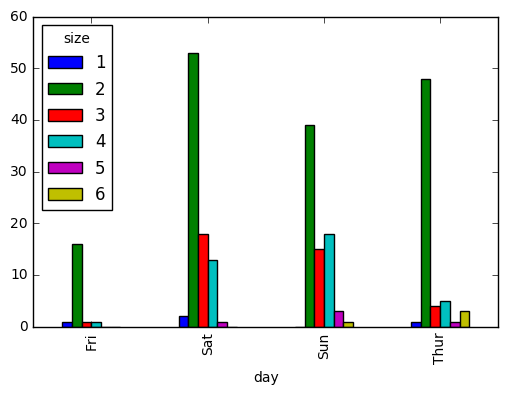

In [12]:
party_counts.plot(kind = 'bar')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


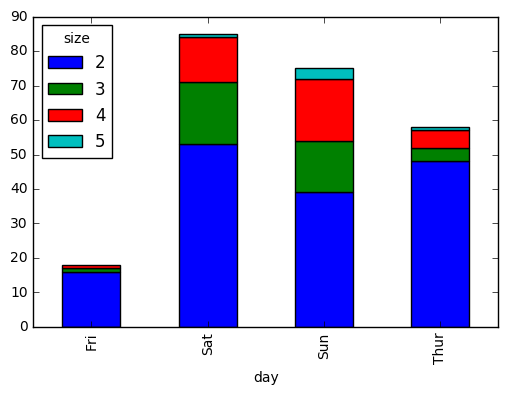

In [13]:
party_counts = party_counts.ix[:, 2:5]
party_counts.plot(kind = 'bar', stacked = True)

In [14]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [17]:
party_counts = party_counts.div(party_counts.sum(1), axis = 0)
party_counts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [18]:
party_counts.sum(1)

day
Fri     1.0
Sat     1.0
Sun     1.0
Thur    1.0
dtype: float64

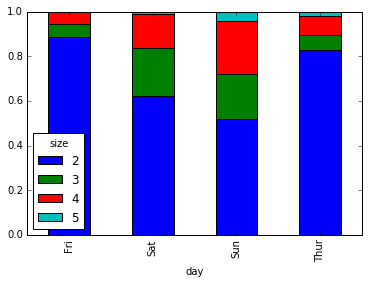

In [19]:
party_counts.plot(kind = 'bar', stacked = True)

### 直方圖(histogram)和密度圖

In [15]:
tips = pd.read_csv('../data/tips.csv')
tips[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


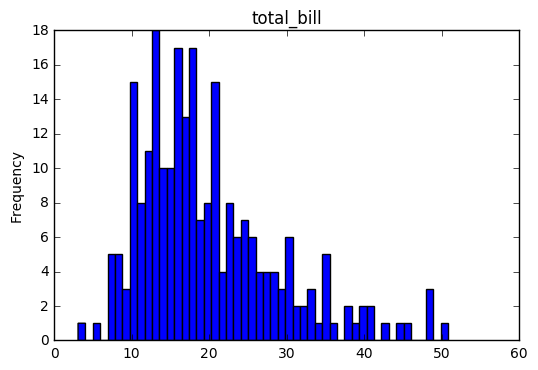

In [16]:
# 可以用 plot(kind = 'hist') 來繪製直方圖
tips.total_bill.plot(kind = 'hist', bins = 50)
plt.title('total_bill')

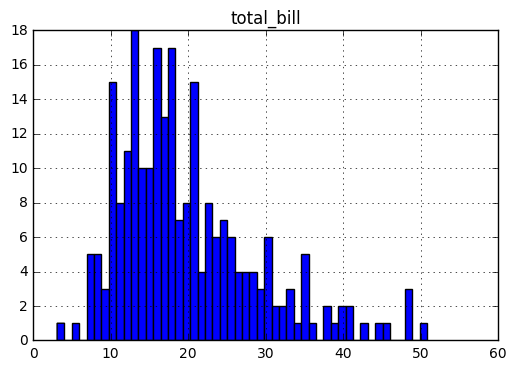

In [17]:
# 也可以用 hist() 來繪製直方圖
tips.total_bill.hist(bins = 50)
plt.title('total_bill')

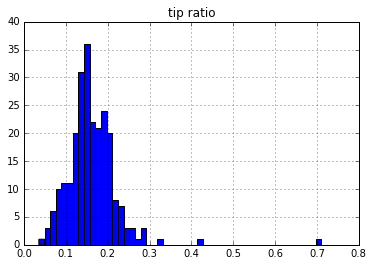

In [23]:
# tip比例 直方圖
tip_ratios = (tips.tip / tips.total_bill)
tip_ratios.hist(bins = 50)
plt.title('tip ratio')

### 散佈圖(scatter plot)

In [18]:
macro = pd.read_csv('../data/macrodata.csv')
macro[:5]

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [19]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data[:5]

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [20]:
# diff(): 以上下元素的差異值填入
trans_data = np.log(data).diff().dropna()
trans_data[:5]

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


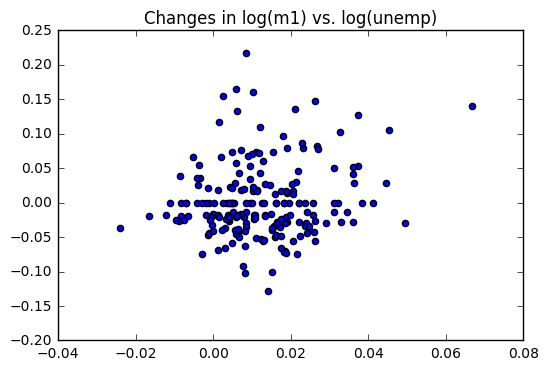

In [21]:
# plt.scatter()可以繪製散佈圖，標示每一個資料row的 兩個columns的數據分布
plt.scatter(trans_data.m1, trans_data.unemp)
plt.title('Changes in log({0}) vs. log({1})'.format('m1', 'unemp'))

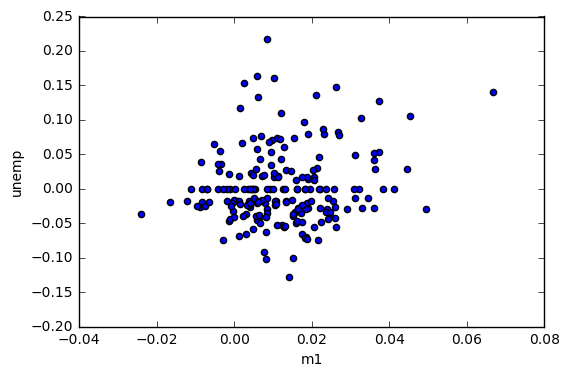

In [22]:
trans_data.plot.scatter('m1', 'unemp')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  app.launch_new_instance()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201CD3948D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000201CE7BD320>]], dtype=object)

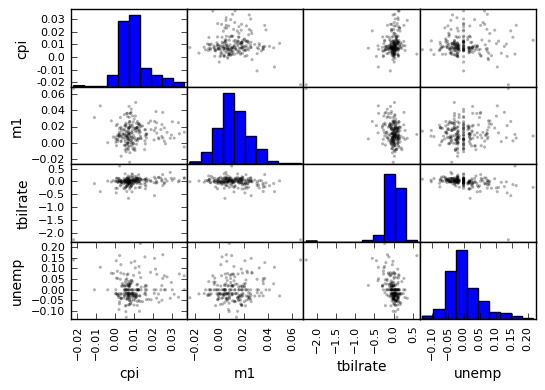

In [23]:
# pandas 提供了 scatter_matrix()函數，方便由DataFrame繪製散佈圖
# 會自動的產生各個columns之間的 scatter diagram
pd.scatter_matrix(trans_data, color = 'k', alpha = 0.3)